In [75]:
import mglearn
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'PCA')

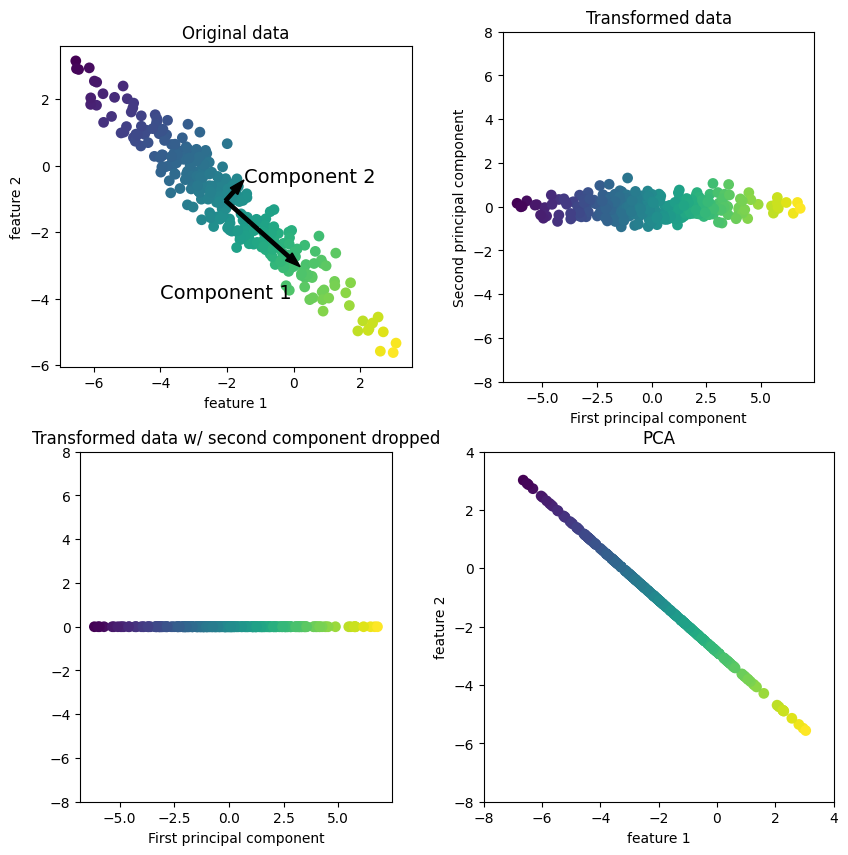

In [76]:
mglearn.plots.plot_pca_illustration()
plt.title("PCA")

In [77]:
from sklearn.datasets import load_breast_cancer
import numpy as np

In [78]:
cancer = load_breast_cancer()

<Figure size 1000x2000 with 0 Axes>

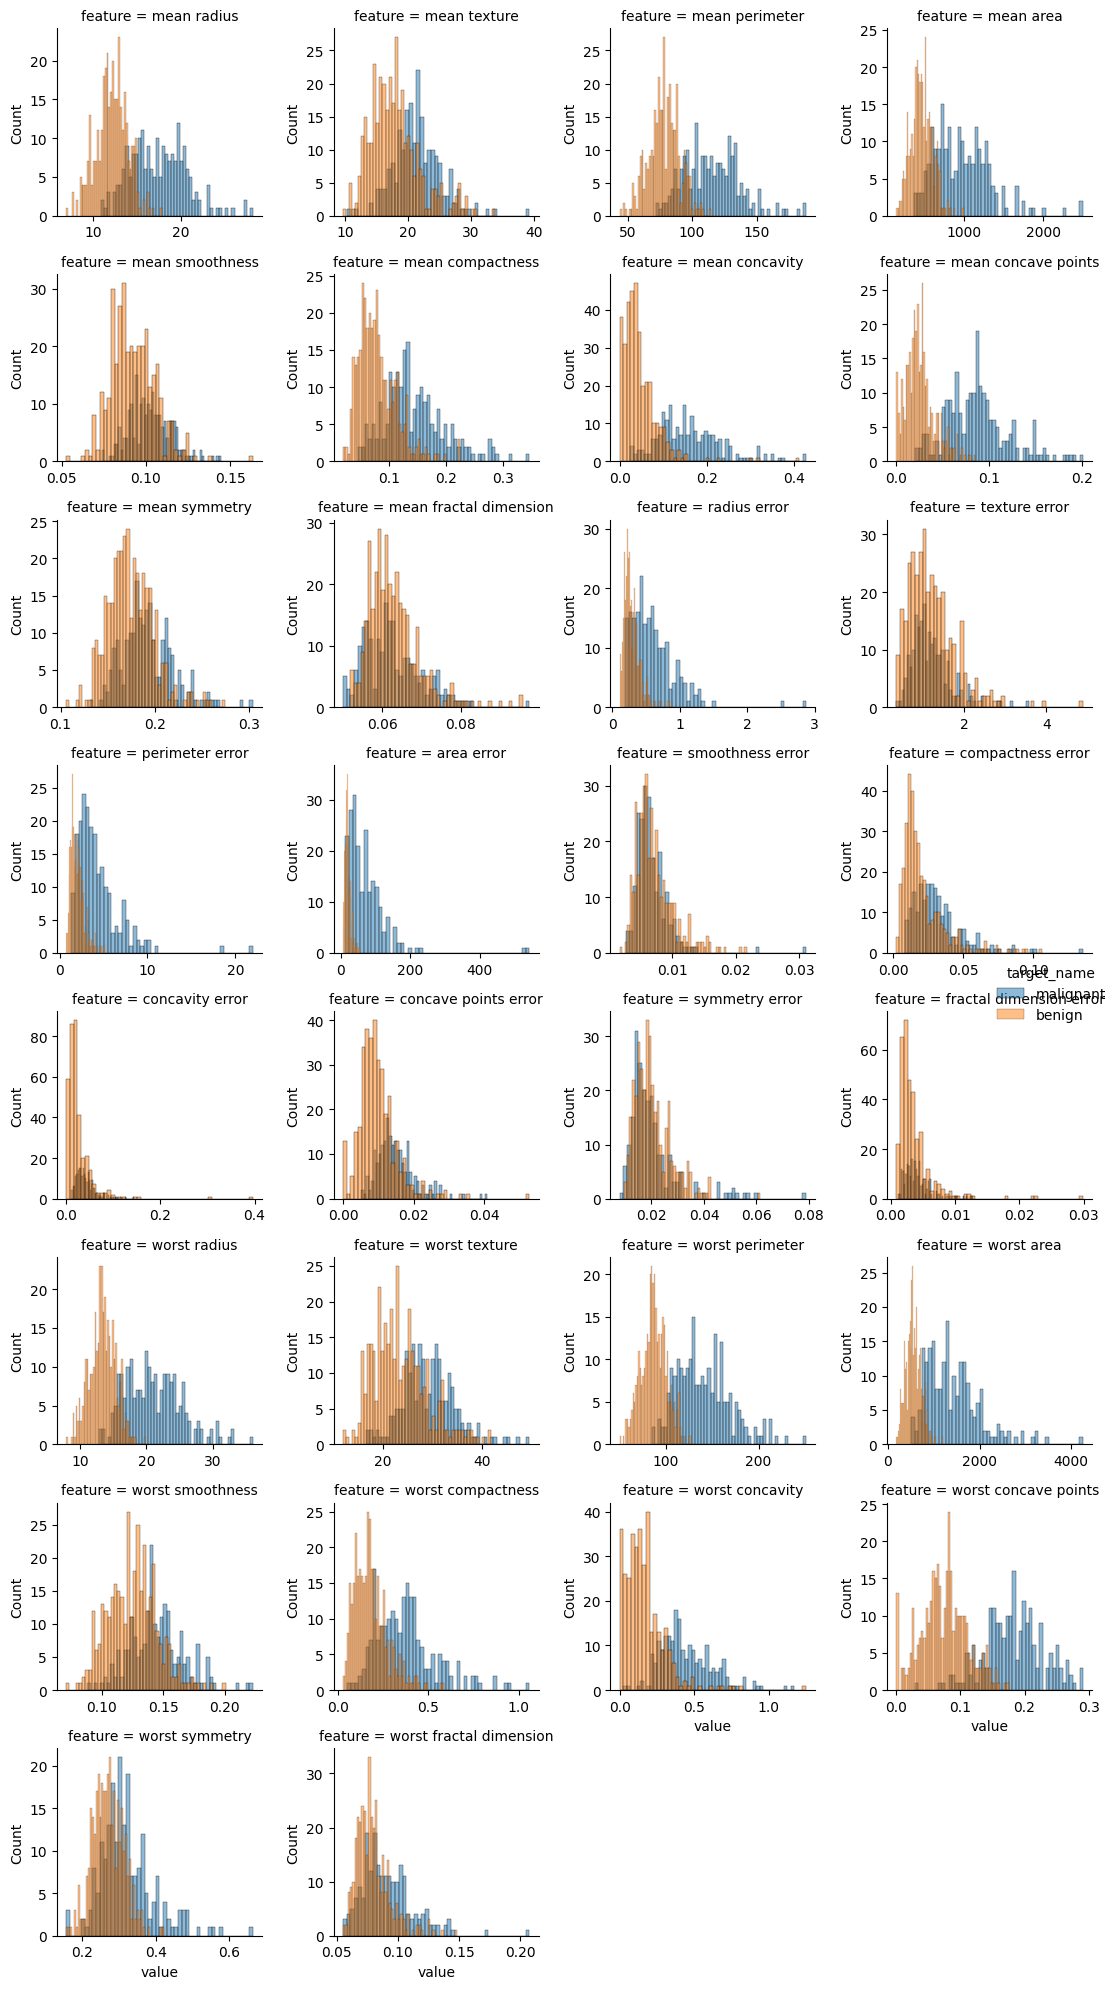

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# DataFrameに変換
df = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
df["target"] = cancer["target"]
df["target_name"] = df["target"].map({0: "malignant", 1: "benign"})

# meltでlong形式に変換
df_melt = df.melt(id_vars=["target_name"], value_vars=cancer["feature_names"],
                  var_name="feature", value_name="value")

# FacetGridで一括描画
plt.figure(figsize=(10, 20))
g = sns.FacetGrid(df_melt, col="feature", col_wrap=4, hue="target_name", sharex=False, sharey=False, height=2.5)
g.map(sns.histplot, "value", alpha=0.5, bins=50)
g.add_legend()
plt.tight_layout()
plt.show()

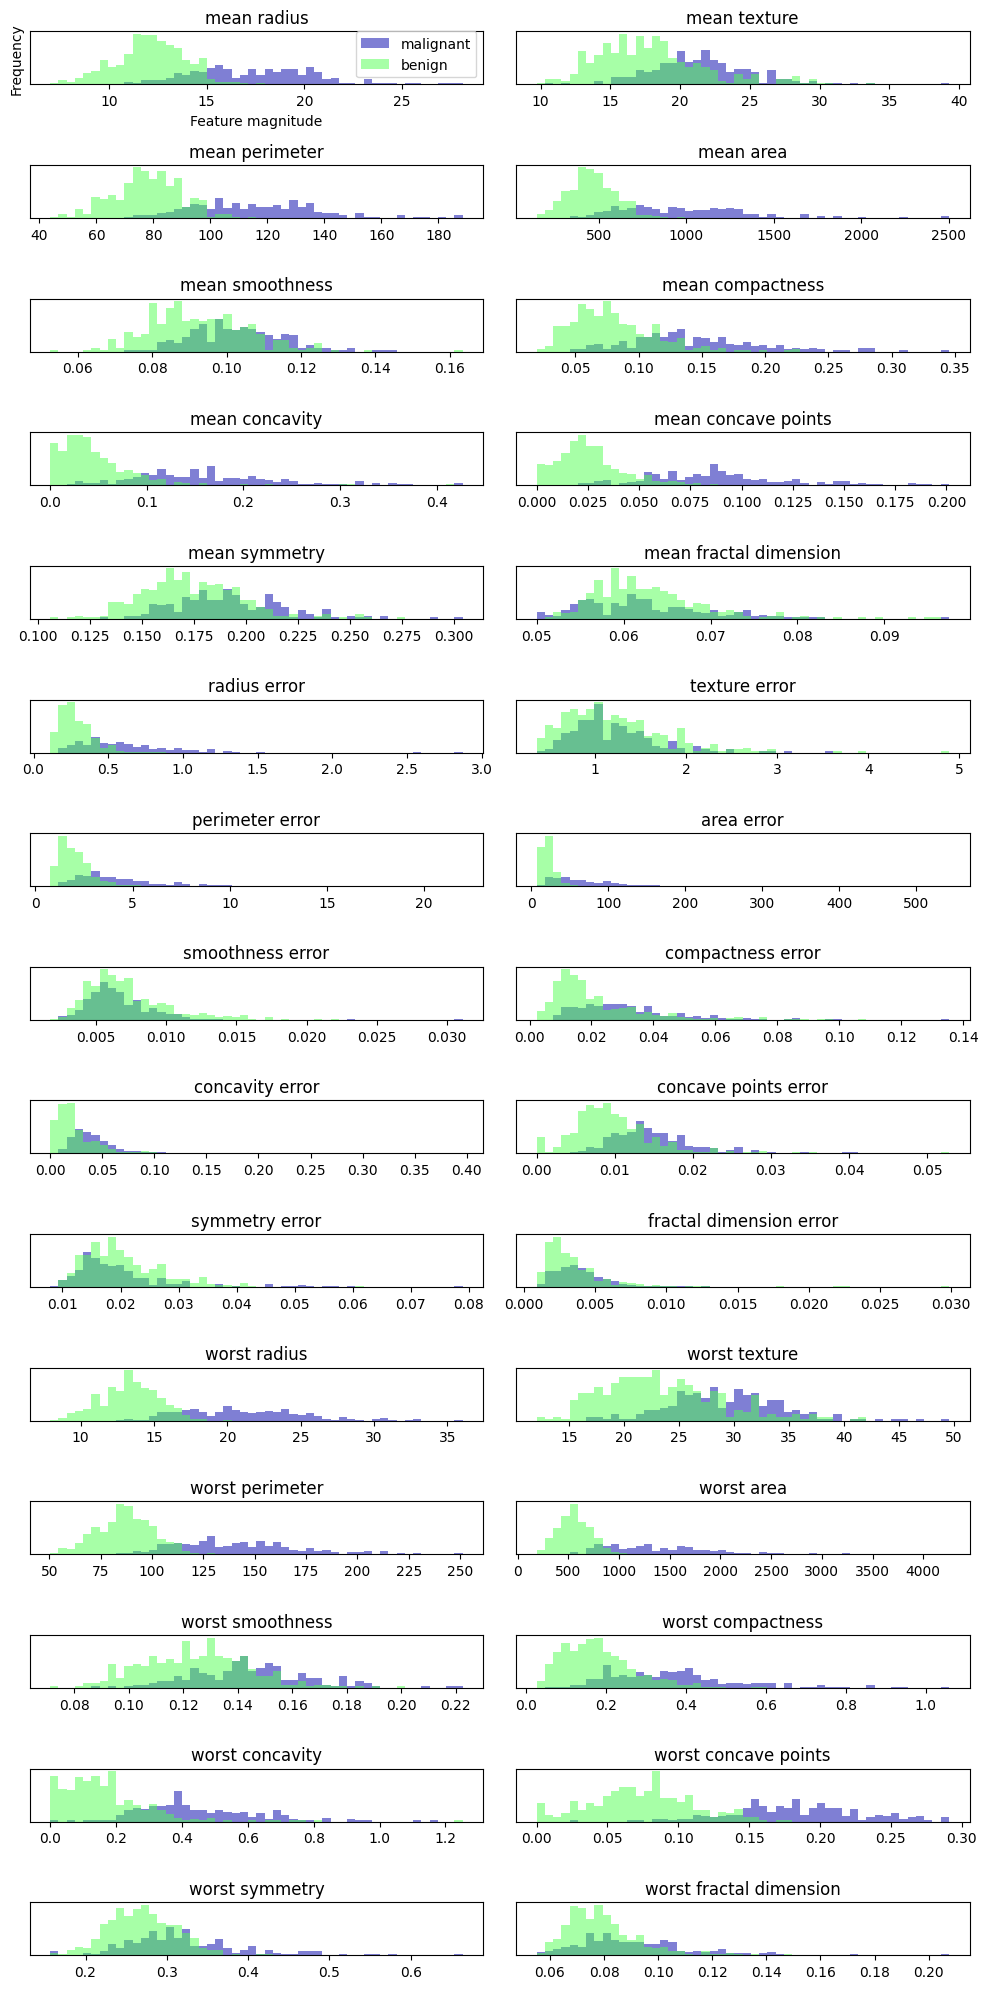

In [80]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer["data"][cancer["target"] == 0]
benign = cancer["data"][cancer["target"] == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer["data"][:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer["feature_names"][i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [81]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [82]:
cancer = load_breast_cancer()

In [83]:
scaler = StandardScaler()
scaler.fit(cancer["data"])
# 分散を1にする
X_scaled = scaler.transform(cancer["data"])

In [84]:
from sklearn.decomposition import PCA

# データの最初の２つの主成分だけ維持する
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


<Axes: >

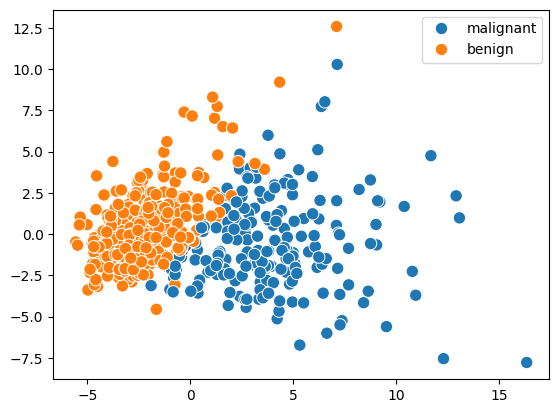

In [85]:
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cancer["target_names"][cancer["target"]], s=80, markers={"malignant": "^"})

Text(0, 0.5, 'Second principal component')

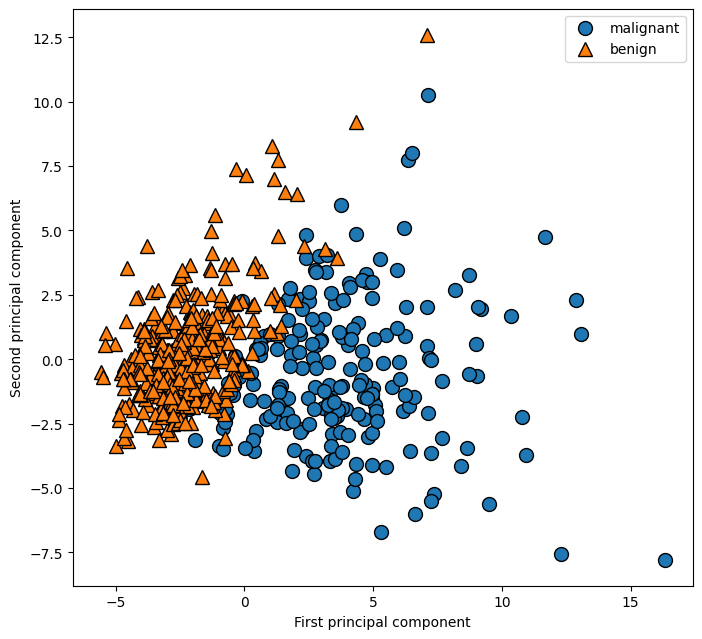

In [86]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer["target"])
plt.legend(cancer["target_names"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [87]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0, 0.5, 'Principal components')

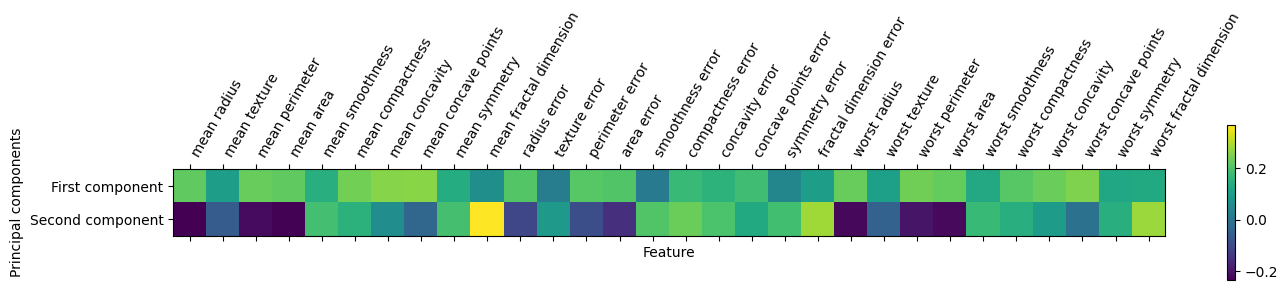

In [88]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer["feature_names"])),
                     cancer["feature_names"], rotation=60, ha="left")
plt.xlabel("Feature")
plt.ylabel("Principal components")